# Stone Data Analyst Challenge

# Table of Contents
1. [Exploratory Analysis](#Exploratory-Analysis)
2. [Question 1](#Question-1)
3. [Question 2](#Question-2)
4. [Question 3](#Question-3)

## Exploratory Analysis

### Import Libraries

In [142]:
import pandas as pd
import psycopg2 as pg
import pandas.io.sql as psql
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Set Credentials

In [143]:
host = 'db-stone-challenge.cjepwwjnksng.us-east-1.rds.amazonaws.com'
db = 'postgres'
user = 'read_only_user'
password =  'banking123'
port = '5432'

### Dababase Connection

In [144]:
connection = pg.connect(host=host, dbname = db, user = user, password = password, port = port)

### Get Tables

In [145]:
dfCustomer = psql.read_sql("SELECT * FROM customers", connection)
dfCard = psql.read_sql("SELECT * FROM cards", connection)
dfTransaction = psql.read_sql("SELECT * FROM transactions", connection)
dfFraud = psql.read_sql("SELECT * FROM frauds", connection)

### Explore Data

In [146]:
dfCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5674 entries, 0 to 5673
Data columns (total 4 columns):
id               5674 non-null object
age              5674 non-null int64
segment          5674 non-null object
vintage_group    5674 non-null object
dtypes: int64(1), object(3)
memory usage: 177.4+ KB


In [147]:
dfCustomer.head(5)

,id,age,segment,vintage_group
0,CC25034,35,Diamond,VG1
1,CC59625,22,Diamond,VG1
2,CC69314,33,Diamond,VG1
3,CC67036,46,Diamond,VG1
4,CC25597,44,Diamond,VG1


In [148]:
dfCard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
card_number     500 non-null object
card_family     500 non-null object
credit_limit    500 non-null int64
customer_id     500 non-null object
dtypes: int64(1), object(3)
memory usage: 15.7+ KB


In [149]:
dfCard.head(5)

,card_number,card_family,credit_limit,customer_id
0,8638-5407-3631-8196,Premium,530000,CC67088
1,7106-4239-7093-1515,Gold,18000,CC12076
2,6492-5655-8241-3530,Premium,596000,CC97173
3,2868-5606-5152-5706,Gold,27000,CC55858
4,1438-6906-2509-8219,Platinum,142000,CC90518


In [150]:
dfTransaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
id                  10000 non-null object
card_number         10000 non-null object
transaction_date    10000 non-null object
value               10000 non-null int64
segment             10000 non-null object
dtypes: int64(1), object(4)
memory usage: 390.7+ KB


In [151]:
dfTransaction.head()

,id,card_number,transaction_date,value,segment
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25
1,CTID45504917,3697-6001-4909-5350,2016-02-11,26726,SEG16
2,CTID47312290,5864-4475-3659-1440,2016-11-01,22012,SEG14
3,CTID25637718,5991-4421-8476-3804,2016-01-28,37637,SEG17
4,CTID66743960,1893-8853-9900-8478,2016-03-17,5113,SEG14


In [152]:
dfFraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
transaction_id    109 non-null object
fraud_flag        109 non-null bool
dtypes: bool(1), object(1)
memory usage: 1.0+ KB


In [153]:
dfFraud.head()

,transaction_id,fraud_flag
0,CTID50558449,True
1,CTID55936882,True
2,CTID63762180,True
3,CTID76723439,True
4,CTID21246201,True


## Question 1

#### The number of transactions and the total value purchased of each credit card grouped by card number and card family.

Answer: 1000 

### 1. Number of Transactions

In [90]:
dfTransaction.count()

id                  10000
card_number         10000
transaction_date    10000
value               10000
segment             10000
dtype: int64

#### Doubt: Is ID unique?

In [91]:
dfTransaction.nunique()

id                  10000
card_number           500
transaction_date      366
value                9035
segment                15
dtype: int64

### 2. Total Value of each credit card number

In [154]:
totalCreditCardNumber = dfTransaction.groupby('card_number').agg({'value': 'sum'})

#### ANSWER

In [155]:
totalCreditCardNumber.sort_values(by=['value'],ascending=False).head(5)

,value
card_number,
9497-8994-1281-9719,926579
5936-1967-4966-6077,882922
7725-3576-5626-3317,876088
5262-2954-4306-9001,860214
3295-6390-4452-7199,838793


### 3. Total value of each credit card family

In [156]:
totalCreditCardFamily = dfTransaction.merge(dfCard, on='card_number').groupby('card_family').agg({'value': 'sum'})

#### ANSWER

In [157]:
totalCreditCardFamily.sort_values(by=['value'],ascending=False)

,value
card_family,
Premium,101253636
Gold,90925620
Platinum,55408157


## Question 2

#### All the customer ids that have "Diamond" segment and made at least 40 transactions.

#### Check Doubt: Is there a customer on more than 1 segment?

In [99]:
dfCustomer.groupby('id').agg({'segment': 'count'}).sort_values(by=['segment'],ascending=False).head(5)

,segment
id,
CC11118,1
CC70345,1
CC70027,1
CC70012,1
CC69984,1


In [21]:
transactionsPerCard = dfTransaction.groupby('card_number').agg({'value': 'count'})

In [22]:
#quantidade de transações de clientes Diamante
customerDiamondTrans = dfCustomer[dfCustomer['segment'] == 'Diamond'].merge(
    dfCard[['customer_id', 'card_number']], left_on='id', right_on='customer_id').merge(
    dfTransaction[['card_number', 'value']], on='card_number').groupby('customer_id').agg({'value': 'count'})

#### ANSWER

In [100]:
customerDiamondTrans[customerDiamondTrans['value'] > 40]

,value
customer_id,
CC32108,42
CC40274,46
CC42497,48
CC60926,53
CC62968,43
CC91171,43
CC96267,44


## Question 3

#### The table frauds shows all the transaction ids that were proven to be fraudulent. Analyze the data to find a correlation between the fraudulent transactions and the other features of the dataset. Explain your results.

### Ideia 
    1. Juntar informações em uma única tabela 
    2. Realizar um modelo inicial de random forest
    3. Analisar a importância das features
    4. Demonstrar a correlação

In [158]:
# construção da tabela para modelo

df = dfTransaction.merge(dfFraud, right_on='transaction_id', left_on='id', how='left').fillna(False).drop(
    columns=['transaction_id']).rename(
    columns={"id": "transaction_id"})

df = df.merge(dfCard, on='card_number').rename(
    columns={"segment": "card_segment"})

df = df.merge(dfCustomer, left_on='customer_id', right_on='id').drop(
    columns=['id'])

In [159]:
df.head(5)

,transaction_id,card_number,transaction_date,value,card_segment,fraud_flag,card_family,credit_limit,customer_id,age,segment,vintage_group
0,CTID28830551,1629-9566-3285-2123,2016-04-24,23649,SEG25,False,Platinum,194000,CC24544,23,Gold,VG3
1,CTID52843489,1629-9566-3285-2123,2016-01-16,48307,SEG17,False,Platinum,194000,CC24544,23,Gold,VG3
2,CTID54901377,1629-9566-3285-2123,2016-04-27,14032,SEG25,False,Platinum,194000,CC24544,23,Gold,VG3
3,CTID47600881,1629-9566-3285-2123,2016-07-05,11063,SEG24,False,Platinum,194000,CC24544,23,Gold,VG3
4,CTID15312006,1629-9566-3285-2123,2016-10-30,47956,SEG18,False,Platinum,194000,CC24544,23,Gold,VG3


In [70]:
x = df.drop(columns=['transaction_id', 'card_number', 'transaction_date', 'customer_id', 'fraud_flag'])
x = pd.get_dummies(x, dummy_na=True)
y = df['fraud_flag']

In [77]:
x.head(5)

,value,credit_limit,age,card_segment_SEG11,card_segment_SEG12,card_segment_SEG13,card_segment_SEG14,card_segment_SEG15,card_segment_SEG16,card_segment_SEG17,...,card_family_Premium,card_family_nan,segment_Diamond,segment_Gold,segment_Platinum,segment_nan,vintage_group_VG1,vintage_group_VG2,vintage_group_VG3,vintage_group_nan
0,23649,194000,23,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,48307,194000,23,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,14032,194000,23,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,11063,194000,23,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,47956,194000,23,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [160]:
#modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

C:\Users\suzanabc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [161]:
# Testando acurácia
accuracy_score(y_test, prediction)

0.9878787878787879

In [162]:
x.columns

Index(['value', 'credit_limit', 'age', 'card_segment_SEG11',
       'card_segment_SEG12', 'card_segment_SEG13', 'card_segment_SEG14',
       'card_segment_SEG15', 'card_segment_SEG16', 'card_segment_SEG17',
       'card_segment_SEG18', 'card_segment_SEG19', 'card_segment_SEG20',
       'card_segment_SEG21', 'card_segment_SEG22', 'card_segment_SEG23',
       'card_segment_SEG24', 'card_segment_SEG25', 'card_segment_nan',
       'card_family_Gold', 'card_family_Platinum', 'card_family_Premium',
       'card_family_nan', 'segment_Diamond', 'segment_Gold',
       'segment_Platinum', 'segment_nan', 'vintage_group_VG1',
       'vintage_group_VG2', 'vintage_group_VG3', 'vintage_group_nan'],
      dtype='object')

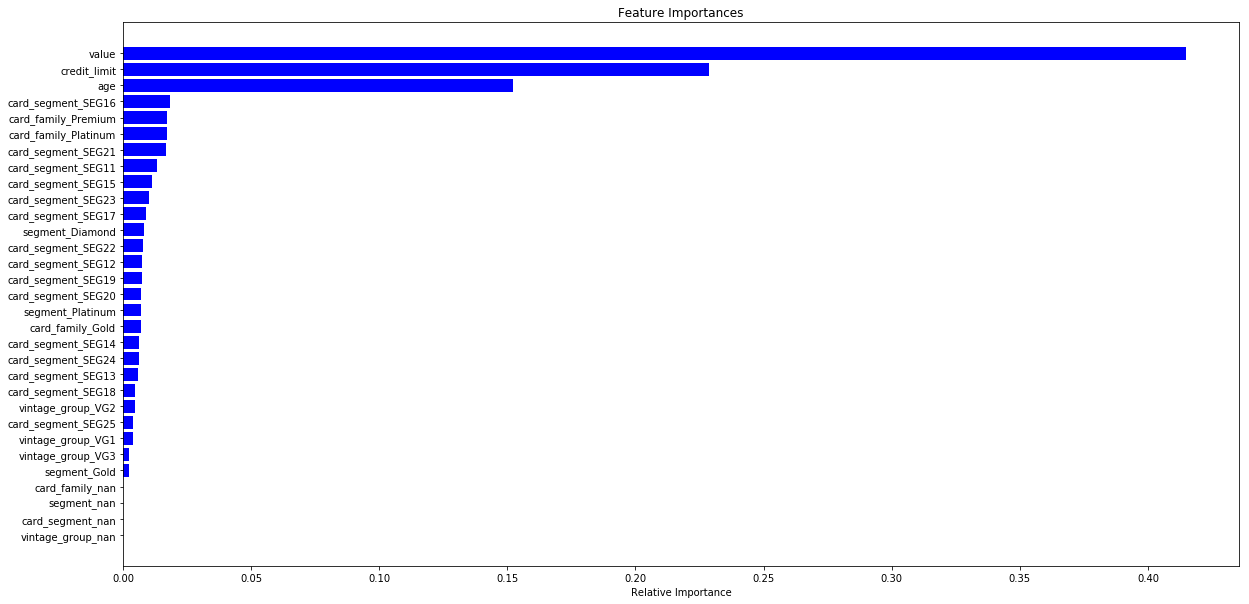

In [163]:
#verifica importancia das features

features = x_train.columns
importances = clf.feature_importances_
index = np.argsort(importances)

plt.figure(figsize=(20,10)) 
plt.title('Feature Importances')
plt.barh(range(len(index)), importances[index], color='b', align='center')
plt.yticks(range(len(index)), [features[i] for i in index])
plt.xlabel('Relative Importance')
plt.show()

In [164]:
clf.feature_importances_

array([0.41484513, 0.22868338, 0.15202935, 0.01329933, 0.00752759,
       0.00586795, 0.00630723, 0.01112052, 0.01829742, 0.00880978,
       0.00458299, 0.00735204, 0.007076  , 0.01690586, 0.00768994,
       0.0100572 , 0.00626787, 0.00386732, 0.        , 0.00689258,
       0.01695277, 0.01727413, 0.        , 0.00831266, 0.00227803,
       0.00702911, 0.        , 0.00370251, 0.00453347, 0.00243786,
       0.        ])

### ANSWER

Como podemos ver no código acima, o modelo de random forest criado possui uma acurácia de aproximadamente 99% para prever transações de fraud nos dados existentes.

Ao analisar a importância de cada feature no modelo gerado, vemos que mais de 80% da importância está concentrada no valor da trasação, limite de crédito e idade do cliente. Logo, essas informações, respectivamente, são as mais relevantes para determinar casos fraudelentos.